# Microsft Bing Image Search Download

Using Microsoft Bing to download images of different foods.

Source: https://docs.microsoft.com/en-us/azure/cognitive-services/bing-image-search/quickstarts/python

**Note:** The docs link above says to use `"https://api.cognitive.microsoft.com/bing/v7.0/images/search"` as the search API URL but due to API changes, the correct link to use is `"https://api.bing.microsoft.com/v7.0/images/search"`. This is true for API instances made after October 30, 2020.

In [9]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import streamlit as st

subscription_key = st.secrets["microsoft_bing_image_search_key"]

# search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search" # OLD
search_url = "https://api.bing.microsoft.com/v7.0/images/search" # New (after Oct 30, 2020)


In [10]:
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}

## Create and send a search request

In [11]:
search_term = "apple"

# See list of params here - https://docs.microsoft.com/en-us/bing/search-apis/bing-image-search/reference/query-parameters 
params = {
    "q": search_term,
    "license": "public",
    "imageType": "photo"
}

In [12]:
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status() # used for debugging
search_results = response.json()

# Get first 16 thumbnail URLs
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][:16]]

In [27]:
# The length of "value" parameter will be set by the "count" parameter:
# see: https://docs.microsoft.com/en-us/bing/search-apis/bing-image-search/reference/query-parameters
# Min: 35, Max: 150
len(search_results["value"])

35

In [19]:
search_results

{'_type': 'Images',
 'instrumentation': {'_type': 'ResponseInstrumentation'},
 'readLink': 'https://api.bing.microsoft.com/api/v7/images/search?q=apple',
 'webSearchUrl': 'https://www.bing.com/images/search?q=apple&FORM=OIIARP',
 'queryContext': {'originalQuery': 'apple',
  'alterationDisplayQuery': 'apple',
  'alterationOverrideQuery': '+apple',
  'alterationMethod': 'AM_JustChangeIt',
  'alterationType': 'CombinedAlterationsChained'},
 'totalEstimatedMatches': 622,
 'nextOffset': 41,
 'currentOffset': 0,
 'value': [{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=apple&id=CE5507F1751FDCB90880EB8422A21B8515FDBB0C&simid=608018587312661112',
   'name': 'Free picture: fruit, food, leaf, delicious, nature, red ...',
   'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.yKPRhaz6pwHrVdgvlM5AJQHaE8&pid=Api',
   'datePublished': '2017-11-15T17:42:00.0000000Z',
   'isFamilyFriendly': True,
   'creativeCommons': 'PublicNoRightsReserved',
   'contentUrl': 'https:

## View images

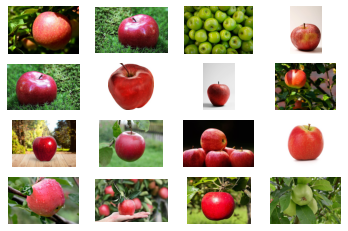

In [13]:
fig, axes = plt.subplots(4, 4)
for i in range(4):
    for j in range (4):
        image_data = requests.get(thumbnail_urls[i+4*j]) # downloads as bytes
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
plt.show()

## Downloading an image

In [ ]:
image = requests.get("https://pixnio.com/free-images/2017/11/10/2017-11-10-21-27-56.jpg")
open("downloaded_img.jpg", "wb").write(image.content)

## Getting URLs for multiple images (for different search terms)

Let's write some code to get a bunch of images downloaded (we can turn the following into a script later).

In [25]:
search_terms = ['apple',
 'banana',
 'beef',
 'blueberries',
 'carrots',
 'chicken_wings',
 'egg',
 'honey',
 'mushrooms',
 'strawberries']

In [37]:
import requests
import matplotlib.pyplot as plt
import streamlit as st

from PIL import Image
from io import BytesIO

API_KEY = st.secrets["microsoft_bing_image_search_key"]
SEARCH_URL = "https://api.bing.microsoft.com/v7.0/images/search"

# Number of images per page
COUNT = 100 # min 35, max 150, see "count" - https://docs.microsoft.com/en-us/bing/search-apis/bing-image-search/reference/query-parameters

headers = {"Ocp-Apim-Subscription-Key" : API_KEY}

In [38]:
img_class_urls_dict = {}
for search_term in search_terms:

    print(f"\nSearching for {search_term} images...")
    params = {
        "q": search_term,
        "license": "public",
        "imageType": "photo",
        "count": COUNT
    }
    
    response = requests.get(SEARCH_URL, 
                            headers=headers, 
                            params=params)
    response.raise_for_status() # used for debugging
    search_results = response.json()

    print(f"Found {search_results['totalEstimatedMatches']} potential image matches...")
    print("Appending image URLs to dictionary... \n")
    img_urls_list = []
    for i, value in enumerate(search_results["value"]):
        img_url = value["contentUrl"]
        img_urls_list.append(img_url)
        if i % 50 == 0:
            print(f"Adding image url for {search_term}: {img_url}...")

    img_class_urls_dict[search_term] = img_urls_list
        
img_class_urls_dict


Searching for apple images...
Found 622 potential image matches...
Appending image URLs to dictionary... 

Adding image url for apple: https://pixnio.com/free-images/2017/11/10/2017-11-10-21-27-56.jpg...
Adding image url for apple: https://www.publicdomainpictures.net/pictures/120000/velka/czerwone-jablko.jpg...

Searching for banana images...
Found 628 potential image matches...
Appending image URLs to dictionary... 

Adding image url for banana: https://get.pxhere.com/photo/plant-fruit-food-produce-yellow-banana-mature-flowering-plant-banana-da-terra-land-plant-banana-family-cooking-plantain-bunch-of-bananas-1294883.jpg...
Adding image url for banana: http://publicdomainpictures.net/pictures/80000/velka/banana-tree-1395010161ZpA.jpg...

Searching for beef images...
Found 732 potential image matches...
Appending image URLs to dictionary... 

Adding image url for beef: https://www.goodfreephotos.com/albums/food/beef-kobe-steaks.jpg...
Adding image url for beef: https://www.publicdomai

{'apple': ['https://pixnio.com/free-images/2017/11/10/2017-11-10-21-27-56.jpg',
  'https://pixnio.com/free-images/2018/07/01/2018-07-01-16-50-29.jpg',
  'https://static.pexels.com/photos/588587/pexels-photo-588587.jpeg',
  'https://pixnio.com/free-images/2017/12/10/2017-12-10-18-54-02.jpg',
  'https://static.pexels.com/photos/207041/pexels-photo-207041.jpeg',
  'https://images.pexels.com/photos/211352/pexels-photo-211352.png?cs=srgb&dl=apple-apples-fruit-fruits-211352.jpg&fm=jpg',
  'http://www.public-domain-image.com/free-images/flora-plants/fruits/apple-pictures/big-red-apple.jpg',
  'https://www.goodfreephotos.com/albums/food/hand-holding-a-red-apple.jpg',
  'https://images.pexels.com/photos/693794/pexels-photo-693794.jpeg?cs=srgb&dl=green-apple-lot-693794.jpg&fm=jpg',
  'http://res.freestockphotos.biz/pictures/17/17238-a-fresh-red-rome-beauty-apple-pv.jpg',
  'https://images.pexels.com/photos/209439/pexels-photo-209439.jpeg?cs=srgb&dl=food-fruits-apples-209439.jpg&fm=jpg',
  'https

In [39]:
len(img_class_urls_dict["beef"])

100

## Downloading data for multiple URLs

Now we have a bunch of URLs, let's download data.

In [41]:
!ls 10_whole_foods

apple         beef          carrot        egg           mushrooms
banana        blueberries   chicken_wings honey         strawberries


In [58]:
# List of exceptions, source: https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/
from requests import exceptions
EXCEPTIONS = set([IOError, FileNotFoundError,
	exceptions.RequestException, exceptions.HTTPError,
	exceptions.ConnectionError, exceptions.Timeout])

In [61]:
import os
import uuid
# from requests import exceptions

os.makedirs("10_whole_foods_test", exist_ok=True)
target_dir = "10_whole_foods_test"

for search_term in search_terms:
    os.makedirs(os.path.join(target_dir, search_term))
    img_urls = img_class_urls_dict[search_term]
    print("\n--------------\n")
    print(f"Attempting to download {len(img_urls)} images of {search_term}... \n")
    for i, img_url in enumerate(img_urls):
        i += 1
        try:
            # Get the image
            img_data = requests.get(img_url, timeout=30)

            # Write image to file
            class_dir = os.path.join(target_dir, search_term)
            save_path = os.path.join(class_dir, 
                                     str(uuid.uuid4()) + ".jpg")
            f = open(save_path, "wb")
            f.write(img_data.content)
            f.close()
        
        except Exception as e:
            if type(e) in EXCEPTIONS:
                print(f"Skipping image: {img_url} due to exception: {e}")
                continue
        
        # Check images downloaded and delete if bogus
        try:
            Image.open(save_path)
            
        except Exception as e:
            print(f"Deleting image: {save_path} due to {e}...")
            os.remove(save_path)
            continue

        if i % 10 == 0:
            print(f"Images downloaded successfully for {search_term}: {len(os.listdir(class_dir))}")

    print(save_path)

Attempting to download 100 images of apple... 

Images downloaded successfully for apple: 10
Deleting image: 10_whole_foods_test/apple/7b05ad02-0e5b-474f-9934-fe04f9a86849.jpg due to cannot identify image file '10_whole_foods_test/apple/7b05ad02-0e5b-474f-9934-fe04f9a86849.jpg'...
Images downloaded successfully for apple: 18
Deleting image: 10_whole_foods_test/apple/94d94b8b-3d6f-4a6d-b628-057ec21383a0.jpg due to cannot identify image file '10_whole_foods_test/apple/94d94b8b-3d6f-4a6d-b628-057ec21383a0.jpg'...
Deleting image: 10_whole_foods_test/apple/bddd9273-f213-4adb-8a89-8185220cb0ca.jpg due to cannot identify image file '10_whole_foods_test/apple/bddd9273-f213-4adb-8a89-8185220cb0ca.jpg'...
Deleting image: 10_whole_foods_test/apple/ac427ba9-5923-4ac8-b1de-d1166fd905d5.jpg due to cannot identify image file '10_whole_foods_test/apple/ac427ba9-5923-4ac8-b1de-d1166fd905d5.jpg'...
Deleting image: 10_whole_foods_test/apple/05a9b34a-058e-4f2c-866a-f6fc325f45c9.jpg due to cannot identify 

FileNotFoundError: [Errno 2] No such file or directory: '10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg'

In [ ]:
# Got an error on itself..

This error occurs when PIL.Image can't open a file:

```
UnidentifiedImageError: cannot identify image file '10_whole_foods_test/apple/47a052b0-c5ee-4e42-9352-0b4f278d0e6d.jpg'
```

So we can use an exception to skip/delete it when it comes across it.

UPTOHERE:

another error appears...

```
Deleting image: 10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg due to cannot identify image file '10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg'...
Deleting image: 10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg due to [Errno 2] No such file or directory: '10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg'...
```

Looks like it doubled up on itself? 

Could remove that code and then check the directory once it's done and delete any images that are corrupt:

1. Save all images to directory (batch save)
2. Scan all saved images and delete if corrupt (batch delete)
3. Move to next class...

```python
 Check images downloaded and delete if bogus
        try:
            Image.open(save_path)
            
        except Exception as e:
            print(f"Deleting image: {save_path} due to {e}...")
            os.remove(save_path)
            continue
```

In [ ]:
# Example download... 
image = requests.get("https://pixnio.com/free-images/2017/11/10/2017-11-10-21-27-56.jpg")
open("downloaded_img.jpg", "wb").write(image.content)